In [1]:
!date

Sat Oct 19 18:07:22 PDT 2024


In [2]:
%env CONDA_PREFIX

'/c4/home/derek/miniconda3/envs/scquint_4'

In [3]:
import pandas as pd
import scanpy as sc
import anndata

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats

from scquint.data import load_adata_from_starsolo, add_gene_annotation

import seaborn as sns
from matplotlib_venn import venn2, venn3

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sc.set_figure_params(dpi=160)

In [4]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [5]:
output_dir = '/c4/home/derek/data1/derek/scSLR/notebooks/fig2/plots/'
os.makedirs(output_dir, exist_ok=True)

## Get merged SLR library

In [6]:
# ##for merged libraries

adatas_spl = {}
samples = [#"sample_1",
           "sample_2"]

library = "merged"
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="features.tsv")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = '5prime'
    #get UMI counts
    UMI_counts = pd.read_csv(input_dir+f"/STAR_outs/{sample}/UMItools_count_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
    UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample

sample_2
Filtering out undefined strand.


/scratch/derek/ipykernel_1392355/1272524425.py:22: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()


In [7]:
adata_spl_SLR = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl_SLR

AnnData object with n_obs × n_vars = 10173 × 828981
    obs: 'UMI_counts'
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif', 'annotated', 'total_unique_mapping', 'total_multi_mapping', 'max_overhang'

In [8]:
sc.pp.calculate_qc_metrics(adata_spl_SLR,inplace=True)


## Get VASA-seq library

In [9]:
from pysradb.sraweb import SRAweb
db = SRAweb()

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/pysradb/utils.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [10]:
df = db.sra_metadata("SRP323648")

In [11]:
input_dir= '/c4/home/derek/data1/derek/reference/VASA/'

In [12]:
accesion_dict = dict(zip(df.run_accession,df.experiment_title.str.split(':',expand=True)[0]))

In [13]:
# # generate barcode whitelists

# exp_dict = {v: k for k, v in accesion_dict.items()}

# for file in os.listdir(input_dir+'counts_matricies'):
    
#     accession = file.split('_')[0]
    
#     SRA = exp_dict[accession]
    
#     vas = pd.read_csv(input_dir+'counts_matricies/'+file, sep='\t',  index_col=0).T
    
#     pd.Series(vas.index).to_csv(input_dir+f'{SRA}_whitelist.txt', header=None, index=None)


In [14]:
adatas_spl = {}

samples = ['SRR14783061','SRR14783062','SRR14783063',
           'SRR14783064','SRR14783065','SRR14783066',
           'SRR14783067','SRR14783068','SRR14783069',
           'SRR14783070','SRR14783071','SRR14783072',
           'SRR14783073','SRR14783074','SRR14783076',
           'SRR14783077','SRR14783078','SRR14783079',
            'SRR14783080','SRR14783082'
          ]

In [15]:
%%time 

for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}_STAR_outs/Solo.out/SJ/raw/", var_filename="features.tsv")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}_STAR_outs/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    

    accession = accesion_dict[sample]
    
    count_matrix = [i for i in os.listdir(input_dir+'counts_matricies') if i.startswith(accession)][0]
    
    adata_spl_sample.obs['UFI_counts'] = pd.read_csv(input_dir+'counts_matricies/'+count_matrix, sep='\t').T.sum(axis=1)
    
    
    adatas_spl[sample] = adata_spl_sample

SRR14783061
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783062
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783063
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783064
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783065
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783066
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783067
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783068
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783069
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783070
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783071
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783072
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783073
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783074
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783076
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783077
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783078
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783079
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783080
Filtering out undefined strand.


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


SRR14783082
Filtering out undefined strand.
CPU times: user 19min 21s, sys: 19.2 s, total: 19min 40s
Wall time: 19min 54s


<timed exec>:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [16]:
adata_spl_VASA = anndata.concat(adatas_spl, index_unique="-", merge="same", label='exp')

In [17]:
adata_spl_VASA

AnnData object with n_obs × n_vars = 15040 × 99729
    obs: 'UFI_counts', 'exp'
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif', 'annotated'

In [18]:
# adata_spl_VASA = adata_spl_VASA[adata_spl_VASA.obs['UFI_counts'] > 7500]

In [19]:
sc.pp.calculate_qc_metrics(adata_spl_VASA ,inplace=True)
# adata_spl_VASA = adata_spl_VASA[adata_spl_VASA.obs['UFI_counts'] >= 7500] 

In [20]:
adata = adata_spl_SLR.concatenate([adata_spl_VASA
                                     ],
                                 batch_categories=['SLR','VASA-seq'],
                                 join='outer' 
                                )

In [21]:
from matplotlib import ticker

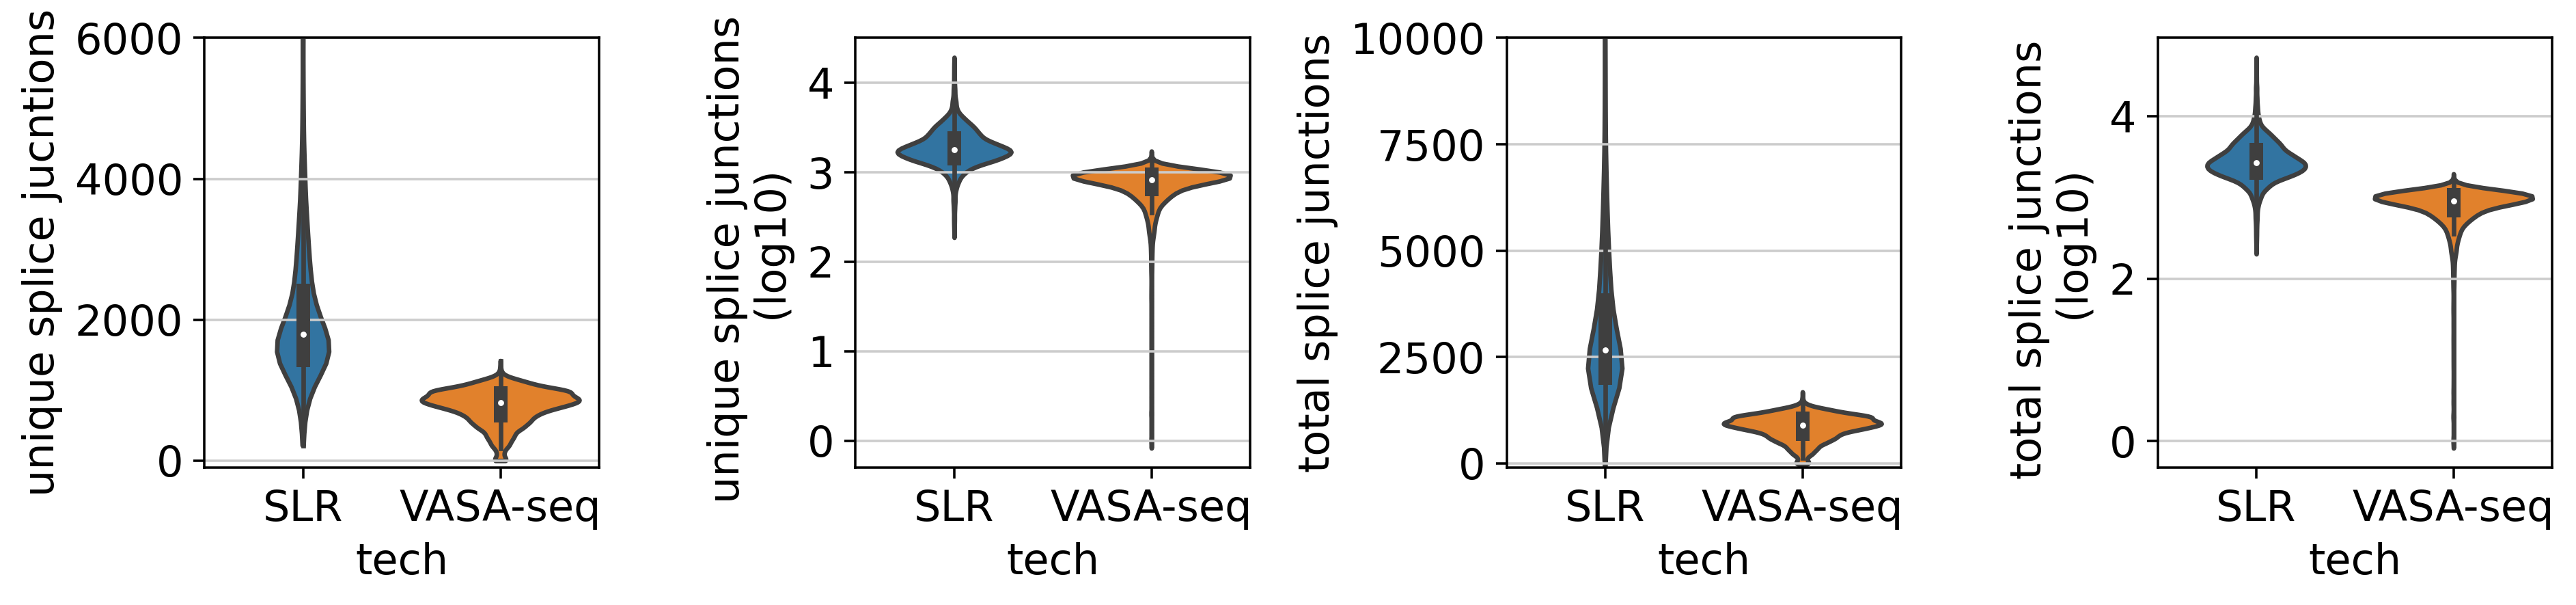

In [22]:
fig, ax = plt.subplots(1,4,figsize=(12,3))


sns.violinplot(data=adata.obs,
               y='n_genes_by_counts',
               x='batch',
               # scale="width",
               ax=ax[0],
               cut=0
              )

ax[0].set_ylabel('unique splice jucntions')
ax[0].set_xlabel('tech')

ax[0].set(ylim=(-100, 6000))



sns.violinplot(data=adata.obs,
                   y=np.log10(adata.obs['n_genes_by_counts']+1),
                   x='batch',
                   # scale="width",
                   ax=ax[1],
              )

ax[1].set_ylabel('unique splice junctions \n (log10)')
ax[1].set_xlabel('tech')


sns.violinplot(data=adata.obs,
                   y='total_counts',
                   x='batch',
                   # scale="width",
                   ax=ax[2],
                   
              )

ax[2].set_ylabel('total splice junctions')
ax[2].set_xlabel('tech')

ax[2].set(ylim=(-100, 10000))


sns.violinplot(data=adata.obs,
                   y=np.log10(adata.obs['total_counts']+1),
                   x='batch',
                   # scale="width",
                   ax=ax[3],
                   
              )

ax[3].set_ylabel('total splice junctions \n (log10)')
ax[3].set_xlabel('tech')

# ax[2].set_yscale('symlog')



fig.tight_layout()

In [23]:
adata.obs.groupby('batch')['n_genes_by_counts'].mean()

batch
SLR         2072.300403
VASA-seq     774.784840
Name: n_genes_by_counts, dtype: float64

/scratch/derek/ipykernel_1392355/4196763894.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels = ['-1','0','1','2','3','4'], fontsize=12)
/scratch/derek/ipykernel_1392355/4196763894.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels = ['-1','0','1','2','3','4'], fontsize=12)


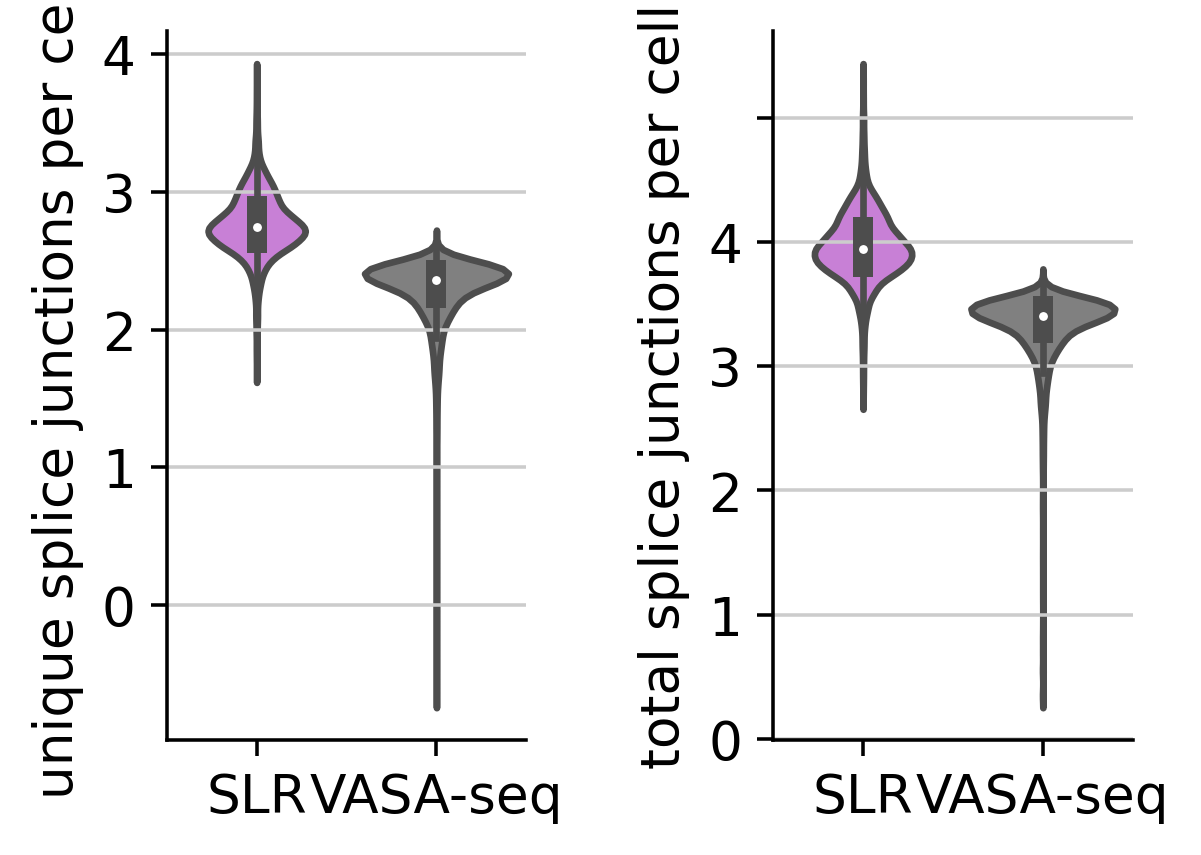

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(4,3))

fig.tight_layout()

sns.violinplot(data=adata.obs,
                   y=np.log1p(adata.obs['n_genes_by_counts']+1),
                   x='batch',
                   scale="count",
                   ax=ax1, 
               palette = ['#C880D6','grey'],
               saturation=1
              )




ax1.set_ylabel('unique splice junctions per cell', fontsize=12)
ax1.set_xlabel(None)

# ax.set_yscale('log')


# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))


ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax1.set_yticklabels(labels = ['-1','0','1','2','3','4'], fontsize=12)


ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_xticklabels(labels = ['SLR','VASA-seq'], fontsize=12)




sns.violinplot(data=adata.obs,
                   y=np.log1p(adata.obs['total_counts']+1),
                   x='batch',
                   scale="count",
                   ax=ax2, 
               palette = ['#C880D6','grey'],
               saturation=1
              )



ax2.set_ylabel('total splice junctions per cell', fontsize=12)
ax2.set_yticklabels(labels = ['-1','0','1','2','3','4'], fontsize=12)

ax2.set_xlabel(None)
ax2.set_xticklabels(labels = ['SLR','VASA-seq'], fontsize=12)

# ax.set_yscale('log')


# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))


ax2.yaxis.set_major_locator(plt.MaxNLocator(6))

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)





# ax.yaxis.set_ticklabels([5, 10, 50, '$1x10^2$', '$5x10^2$', '$1x10^3$', '$5x10^3$', '$1x10^4$', '$5x10^4$'], fontsize=10)

# ax1.grid(False)

# fig.savefig(output_dir+'SLR_VASA_uniSJ.pdf')


In [ ]:
break

In [ ]:
break

In [ ]:
adata_spl_SLR[adata_spl_SLR.obs.total_counts > 1500]

In [ ]:
sns.scatterplot(data=adata[adata.obs.batch=='VASA-seq'].obs,
                   y=np.log10(adata.obs['n_genes_by_counts']+1),
                   x='total_counts',
                    hue='batch',
                   # scale="count",
                   # ax=ax,
                s=1,
               
              )


In [ ]:
adata_spl_SLR.obs.total_counts.max()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(8,3))

sns.violinplot(data=adata.obs,
                   y='pct_counts_in_top_50_genes',
                   x='batch',
                   # scale="width",
                   ax=ax[0],
                   
              )

sns.violinplot(data=adata.obs,
                   y='pct_counts_in_top_100_genes',
                   x='batch',
                   # scale="width",
                   ax=ax[1],
                   
              )

sns.violinplot(data=adata.obs,
                   y='pct_counts_in_top_500_genes',
                   x='batch',
                   # scale="width",
                   ax=ax[2],
                   
              )

fig.tight_layout()


In [ ]:
adata_spl_VASA_ = adata_spl_VASA[:,adata_spl_VASA.var.total_counts > 100]

In [ ]:
sc.pp.calculate_qc_metrics(adata_spl_VASA_ ,inplace=True)

In [ ]:
adata_spl_SLR_ = adata_spl_SLR[:,adata_spl_SLR.var.total_counts > 100]

In [ ]:
sc.pp.calculate_qc_metrics(adata_spl_SLR_ ,inplace=True)

In [ ]:
adata_ = adata_spl_SLR_.concatenate([adata_spl_VASA_
                                     ],
                                 batch_categories=['SLR','VASA-seq'],
                                 join='outer' 
                                )

In [ ]:
fig, ax = plt.subplots(figsize=(3,5))

sns.violinplot(data=adata.obs,
                   y='n_genes_by_counts',
                   x='batch',
                   # scale="count",
                   ax=ax,
               
              )

ax.set_ylabel('unique splice junctions \n per cell')
ax.set_xlabel(None)

ax.set_yscale('log')


# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))


# ax.yaxis.set_major_locator(plt.MaxNLocator(12))



# ax.yaxis.set_ticklabels([5, 10, 50, '$1x10^2$', '$5x10^2$', '$1x10^3$', '$5x10^3$', '$1x10^4$', '$5x10^4$'], fontsize=10)

ax.grid(False)

# fig.savefig(output_dir+'SLR_VASA_uniSJ.pdf')